In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import k.Activations.functions as Activations
import k.Layers.functions as Layers
import k.Losses.functions as Losses
import k.Optimizers.functions as Optimizers
import k.Networks.functions as Networks

In [15]:
tf.random.set_seed(3318)

In [16]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

x_train = x_train.astype(dtype=np.float32)
y_train = y_train.reshape(y_train.shape[0], 1).astype(dtype=np.float32)
x_test = x_test.astype(dtype=np.float32)
y_test = y_test.reshape(y_test.shape[0], 1).astype(dtype=np.float32)

print(x_train.shape)
print(y_train.shape)

(404, 13)
(404, 1)


In [17]:
model = Networks.Neural_network()
# model.network.append(Layers.Input(input_shape=(13)))
model.network.append(Layers.Dense(64, input_shape=(13), activation='relu'))
model.network.append(Layers.Dense(32, activation='relu'))
model.network.append(Layers.Dense(16, activation='relu'))
model.network.append(Layers.Dense(1, activation='linear'))

optimizer = Optimizers.Adam(learning_rate=1e-4)
model.compile('mse', optimizer, metrics='mae')

In [18]:
model.evaluate(x_test, y_test)

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=948.0361>,
 'metrics': <tf.Tensor: shape=(), dtype=float32, numpy=28.676365>}

In [19]:
hist = model.fit(x_train, y_train, batch_size=256, epochs=100, verbose=1, validation_data=(x_test, y_test))

epoch: 001  | loss : 939.0665  | val_loss : 756.3351  | metrics : 28.6759
epoch: 002  | loss : 750.2550  | val_loss : 592.5449  | metrics : 24.9470
epoch: 003  | loss : 534.4065  | val_loss : 456.9485  | metrics : 21.0230
epoch: 004  | loss : 479.8793  | val_loss : 348.3683  | metrics : 19.1036
epoch: 005  | loss : 373.7355  | val_loss : 266.8212  | metrics : 16.3964
epoch: 006  | loss : 261.8552  | val_loss : 210.8334  | metrics : 13.0165
epoch: 007  | loss : 213.9165  | val_loss : 177.5669  | metrics : 11.7746
epoch: 008  | loss : 192.8051  | val_loss : 164.0406  | metrics : 10.2065
epoch: 009  | loss : 145.5742  | val_loss : 166.3645  | metrics : 9.2218
epoch: 010  | loss : 152.7423  | val_loss : 179.6525  | metrics : 9.3324
epoch: 011  | loss : 165.0272  | val_loss : 198.3692  | metrics : 10.1321
epoch: 012  | loss : 187.4464  | val_loss : 219.4281  | metrics : 10.5038
epoch: 013  | loss : 211.3164  | val_loss : 238.3484  | metrics : 11.5516
epoch: 014  | loss : 187.4656  | val_los

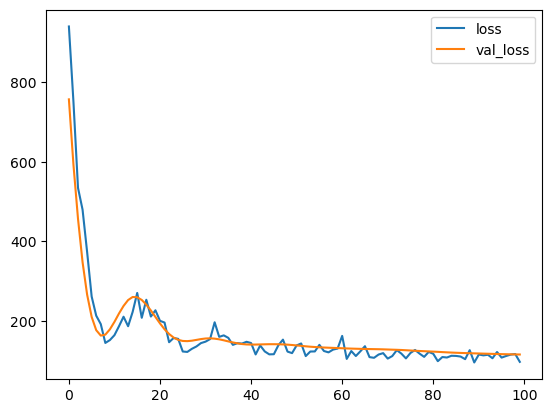

In [20]:
plt.plot(hist['loss'], label='loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [21]:
model.evaluate(x_test, y_test)

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=116.58152>,
 'metrics': <tf.Tensor: shape=(), dtype=float32, numpy=8.047991>}

### make tensorflow model to compare

In [22]:
tf_model = tf.keras.Sequential()
tf_model.add(tf.keras.layers.Dense(64, input_shape=x_train.shape[1::], activation='relu'))
tf_model.add(tf.keras.layers.Dense(32, activation='relu'))
tf_model.add(tf.keras.layers.Dense(16, activation='relu'))
tf_model.add(tf.keras.layers.Dense(1, activation='linear'))

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
tf_model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

In [23]:
tf_model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 13ms/step - loss: 6735.3325 - mae: 81.0305


[6735.33251953125, 81.03047180175781]

In [24]:
tf_hist = tf_model.fit(x_train, y_train, epochs=100, batch_size=256, verbose=1, validation_data=(x_test, y_test))

Epoch 1/100
2/2 [==============================] - 1s 69ms/step - loss: 6303.4141 - mae: 77.9844 - val_loss: 6432.1831 - val_mae: 79.1565
Epoch 2/100
2/2 [==============================] - 0s 58ms/step - loss: 6026.1738 - mae: 76.1901 - val_loss: 6135.4375 - val_mae: 77.2740
Epoch 3/100
2/2 [==============================] - 0s 78ms/step - loss: 5755.3130 - mae: 74.3760 - val_loss: 5846.3843 - val_mae: 75.3917
Epoch 4/100
2/2 [==============================] - 0s 82ms/step - loss: 5490.1953 - mae: 72.5747 - val_loss: 5566.7881 - val_mae: 73.5225
Epoch 5/100
2/2 [==============================] - 0s 102ms/step - loss: 5232.4331 - mae: 70.7722 - val_loss: 5297.3301 - val_mae: 71.6702
Epoch 6/100
2/2 [==============================] - 0s 73ms/step - loss: 4987.0405 - mae: 68.9993 - val_loss: 5038.6616 - val_mae: 69.8406
Epoch 7/100
2/2 [==============================] - 0s 124ms/step - loss: 4751.8955 - mae: 67.2534 - val_loss: 4789.8560 - val_mae: 68.0273
Epoch 8/100
2/2 [===============

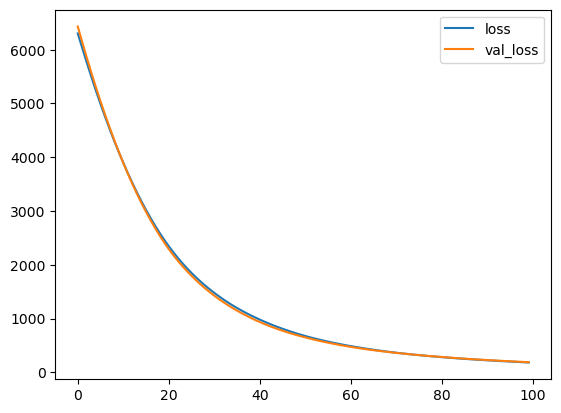

In [25]:
plt.plot(tf_hist.history['loss'], label='loss')
plt.plot(tf_hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [26]:
tf_model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 187.6489 - mae: 11.0116


[187.6488800048828, 11.011582374572754]